In [1]:
#import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
#loading file
data = pd.read_csv('dataset_actual.csv')

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
len(data)

319795

In [5]:
#data type
print(data['Sex'].dtype)
print(data['GenHealth'].dtype)
print(data['Smoking'].dtype)
print(data['GenHealth'].dtype)
print(data['SleepTime'].dtype)
print(data['SkinCancer'].dtype)

object
object
object
object
int64
object


In [6]:
#Drop N/A/Empty Values
data = data.dropna(axis=0, subset=["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])

In [7]:
#Encoding Datas (Categorical Features)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Sex'] = enc.fit_transform(data['Sex'])
data['GenHealth'] = enc.fit_transform(data['GenHealth'])
data['Smoking'] = enc.fit_transform(data['Smoking'])

In [8]:
x = pd.DataFrame(data, columns= ["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
y = pd.DataFrame(data, columns= ["SkinCancer"]) #result

#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=5, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [9]:
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [10]:
#Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  90.70341937803906


### Trying with 100 data points as per the requirement in description

In [11]:
#Reading Data Again
data = pd.read_csv('dataset_actual.csv')

#Encoding Datas (Categorical Features)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Sex'] = enc.fit_transform(data['Sex'])
data['GenHealth'] = enc.fit_transform(data['GenHealth'])
data['Smoking'] = enc.fit_transform(data['Smoking'])

#Dropping data with N/A Values
data = data.dropna(axis=0)


#Taking first 100 datas
data = data[:100]


In [12]:
count = data.groupby(['BMI']).size()
print(count)

count = data.groupby(['Smoking']).size()
print(count)

count = data.groupby(['Sex']).size()
print(count)

count = data.groupby(['GenHealth']).size()
print(count)

count = data.groupby(['SleepTime']).size()
print(count)

BMI
16.60    1
18.13    1
19.02    1
19.47    1
19.49    1
        ..
40.00    1
40.69    1
44.29    1
45.35    1
46.52    1
Length: 93, dtype: int64
Smoking
0    51
1    49
dtype: int64
Sex
0    70
1    30
dtype: int64
GenHealth
0     9
1    18
2    31
3     8
4    34
dtype: int64
SleepTime
4      3
5     11
6     17
7     21
8     35
9      5
10     5
12     2
15     1
dtype: int64


In [18]:
# print(data['BMI'])
# print(max(data['BMI']))
bmi_18_5 = 0 #below 18.55 BMI
bmi_18_5_25 = 0 
bmi_25_30 = 0
bmi_30_35 = 0
bmi_35 = 0 #more than 35
for i in data['BMI']:
    if(float(i)<18.5):
        bmi_18_5 = bmi_18_5 + 1
    elif (float(i)>18.5 and float(i)<25):
        bmi_18_5_25 = bmi_18_5_25 + 1
    elif (float(i)>25 and float(i)<30):
        bmi_25_30 = bmi_25_30 + 1
    elif (float(i)>30 and float(i)<35):
        bmi_30_35 = bmi_30_35 + 1
    else:
        bmi_35 = bmi_35 + 1
print("BMI below 18.5: ",bmi_18_5)
print("BMI more than 18.5 and lower than 25: ",bmi_18_5_25)
print("BMI more than 25 and lower than 30: ",bmi_25_30)
print("BMI more than 30 and lower than 35: ",bmi_30_35)
print("BMI above 35: ",bmi_35)

BMI below 18.5:  2
BMI more than 18.5 and lower than 25:  32
BMI more than 25 and lower than 30:  36
BMI more than 30 and lower than 35:  22
BMI above 35:  8


In [14]:
x = pd.DataFrame(data, columns= ["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
y = pd.DataFrame(data, columns= ["SkinCancer"]) #result

#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=5, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [15]:
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
      dtype=object)

In [16]:
#Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  55.00000000000001


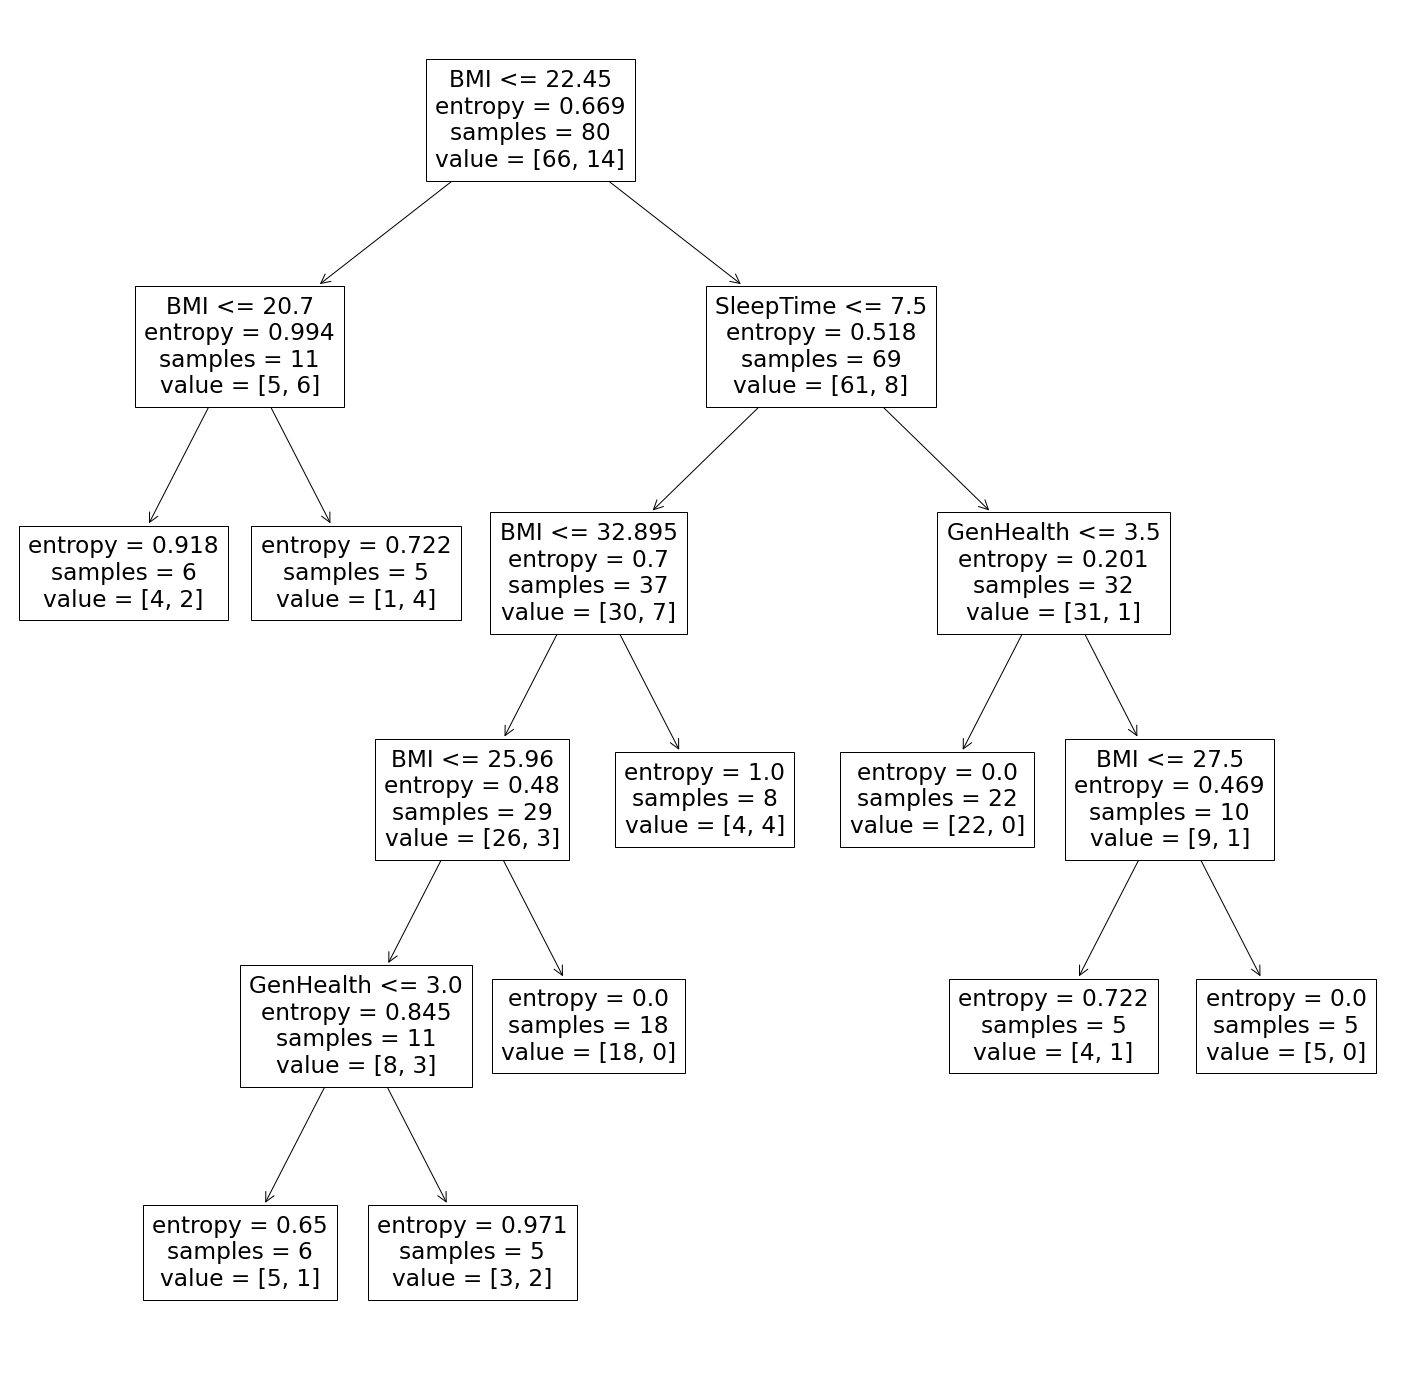

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clf_entropy,ax=ax,feature_names=["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
plt.show()